In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [2]:
map = {}
class Data:
    # lay du lieu tu trong file
    def __init__(self, filename):
        lines = open(filename).read().split('\n')
        i = 0
        n = 1
        for line in lines:
            i = i + 1
            if i >= 7 and line != 'EOF' and line != '':
                type1 = [float(_) for _ in line.split()]
                map[n] = type1
                n = n + 1

In [28]:
class GA:  
    def distance(self, city1, city2):
        if city1 in map and city2 in map:
            point1 = map[city1]
            point2 = map[city2]
            distance = np.power(((point1[1]-point2[1])**2 + (point1[2]-point2[2])**2), 0.5)
        return distance
    
    def routeDistance(self, route):
        distance = 0
        for i in range(0, len(route)):
            fromCity = route[i]
            toCity = None
            if i + 1 < len(route):
                toCity = route[i + 1]
            else:
                toCity = route[0]
            distance += self.distance(fromCity, toCity)
        return distance
    
    def routeFitness(self, route):
        fitness = 1 / float(self.routeDistance(route))
        return fitness
    
    def createRoute(self):
        route = random.sample(list(map), len(map))
        return route
    
    def initialPopulation(self, popSize):
        population = []
        for i in range(popSize):
            population.append(self.createRoute())
        return population
    
    def selection(self, population):
        # chon lua theo fitness = 1/distance, lua chon ngau nhien boi vong quay roullette
        # luu ti le phan tram tuong ung voi moi diem o percentFitness
        fitnessValue = 0
        for i in range(popSize):
            fitness[i] = self.routeFitness(population[i])
            fitnessValue += fitness[i]
            percentFitness[i] = fitnessValue
        for i in fitness:
            percentFitness[i] = float(percentFitness[i]*100/fitnessValue)
        eliteRoute = {}
        i = 0
        while i < eliteSize:
            rand = float(random.randrange(0, 10000))/100
            for n in percentFitness:
                if percentFitness[n] < rand <= percentFitness[n + 1]:
                    if population[n] in list(eliteRoute.values()):
                        i = i
                    else:
                        eliteRoute[i] = population[n]
                        i = i + 1
        return eliteRoute

    def crossover(self, parent1, parent2):
        child = []
        childP1 = []
        childP2 = []
        geneA = int(random.random() * len(parent1))
        geneB = int(random.random() * len(parent2))
        startGene = min(geneA, geneB)
        endGene = max(geneA, geneB)
        for i in range(startGene, endGene):
            childP1.append(parent1[i])
        childP2 = [item for item in parent2 if item not in childP1]
        child = childP1 + childP2
        return child
    
    def crossoverPop(self, eliteRoute, eliteSize):
        children = []
        child = []
        for i in range(len(eliteRoute)-1):
            child = self.crossover(eliteRoute[i], eliteRoute[i+1])
            children.append(child)
        children.append(self.crossover(eliteRoute[eliteSize-1], eliteRoute[0]))
        return children
    
    def mutate(self, children, mutationRate):
        for i in range(len(children)):
            if random.random() < mutationRate:
                print ('Mutant!')
                swapped = int(random.random() * len(children[i]))
                swapWith = int(random.random() * len(children[i]))
                gene1 = children[i][swapped]
                gene2 = children[i][swapWith]
                children[i][swapped] = gene2
                children[i][swapWith] = gene1
        return children
    
    def evaluation(self, currentGen, eliteSize, mutationRate):
        eliteRoute = self.selection(currentGen)
        crossChildren = self.crossoverPop(eliteRoute, eliteSize)
        crossChildren = self.mutate(crossChildren, mutationRate)
        nextGeneration = currentGen
        fit = {}
        for i in range(len(nextGeneration)):
            fit[i] = self.routeFitness(nextGeneration[i])
        for i in range(len(crossChildren)):
            worstfit = min(list(fit.values()))
            for j in range(len(nextGeneration)):
                if fit[j] == worstfit:
                    nextGeneration[j] = crossChildren[i]
                    fit[j] = self.routeFitness(crossChildren[i])
        return nextGeneration
      
    def BestIndividual(self, population):
        bestIndividual = {0: None, 1: None}
        bestDistance = 200000
        pos = 0
        for i in range(len(population)):
            if self.routeDistance(population[i]) <= bestDistance:
                bestDistance = self.routeDistance(population[i])
                pos = i
        bestIndividual[0] = population[pos]
        bestIndividual[1] = bestDistance
        return bestIndividual

File data: 
Generation 0 best distance:  31922.3973293211
Generation 1 best distance:  31922.3973293211
Mutant!
Generation 2 best distance:  31394.541514118813
Generation 3 best distance:  31394.541514118813
Generation 4 best distance:  31394.541514118813
Generation 5 best distance:  31394.541514118813
Generation 6 best distance:  31283.272634919624
Generation 7 best distance:  31278.648353778073
Generation 8 best distance:  31109.646416190346
Generation 9 best distance:  31109.646416190346
Generation 10 best distance:  29936.00746521303
Generation 11 best distance:  29936.00746521303
Generation 12 best distance:  29936.00746521303
Generation 13 best distance:  29936.00746521303
Generation 14 best distance:  29587.15768435002
Generation 15 best distance:  29512.934083681044
Generation 16 best distance:  29512.934083681044
Generation 17 best distance:  29466.184090538427
Generation 18 best distance:  29466.184090538427
Generation 19 best distance:  29183.26988353593
Generation 20 best d

Generation 166 best distance:  20078.24321623353
Generation 167 best distance:  20078.24321623353
Generation 168 best distance:  20078.24321623353
Generation 169 best distance:  20038.009382650696
Generation 170 best distance:  20038.009382650696
Generation 171 best distance:  20029.016841214176
Generation 172 best distance:  19971.102704122197
Generation 173 best distance:  19911.780588271493
Generation 174 best distance:  19911.780588271493
Generation 175 best distance:  19911.780588271493
Generation 176 best distance:  19826.67576679909
Generation 177 best distance:  19826.67576679909
Generation 178 best distance:  19801.639261558485
Generation 179 best distance:  19801.639261558485
Generation 180 best distance:  19756.57853463229
Generation 181 best distance:  19756.57853463229
Generation 182 best distance:  19756.57853463229
Generation 183 best distance:  19756.57853463229
Generation 184 best distance:  19642.788213753855
Generation 185 best distance:  19642.788213753855
Generatio

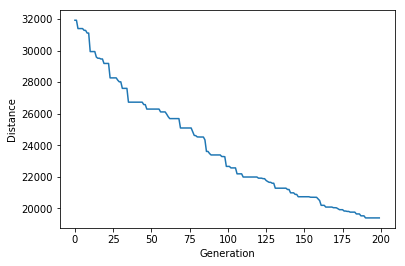

In [37]:
print ("File data: ")
# filename = raw_input ("")
filename = "a280.tsp"
a = Data(filename)
popSize = 100
fitness = {}
percentFitness = {}
eliteSize = 50
mutationRate = 0.001
time = 200
#########

test = GA()
population = test.initialPopulation(popSize)
BestDistance = test.routeDistance(population[1])
i = 1
progress = []
for i in range(time):
    population = test.evaluation(population, eliteSize, mutationRate)
    print ('Generation', i, 'best distance: ', test.routeDistance(test.BestIndividual(population)[0]))
    ###
    fitnessResults = {}
    for j in range(len(population)):
        fitnessResults[j] = test.routeFitness(population[j])
    a = sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
    progress.append(1 / a[0][1])
    ###
    if BestDistance > test.BestIndividual(population)[1]:
        BestDistance = test.BestIndividual(population)[1]
        BestWay = test.BestIndividual(population)[0]
# print ('population:', population)
print ('Best way:', BestWay)
print ('Best distance:', test.routeDistance(BestWay))

plt.plot(progress)
plt.ylabel('Distance')
plt.xlabel('Generation')
plt.show()